In [114]:
# ResNet101 pretrained prediction

import torch
from torchvision import models
from torchvision import transforms
from PIL import Image
from os import listdir

In [115]:
resnet = models.resnet101(pretrained=True)
print(resnet)

track_running_stats=True)
      )
    )
    (1): Bottleneck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (2): Bottleneck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [116]:
print(type(resnet))
rn_class = models.resnet.ResNet
print(issubclass(rn_class, torch.nn.Module)) # verify ResNet class as subclass of torch

<class 'torchvision.models.resnet.ResNet'>
True


In [117]:
# Image preprocessor
preprocessor = transforms.Compose([
    transforms.Resize(256),     # Resize to 256x256 img
    transforms.CenterCrop(224), # Crop of get region of interest
    transforms.ToTensor(),      # PyTorch's counterpart of Numpy's arrays
    transforms.Normalize(       # Normalize input the same way ResNet
    mean=[0.485, 0.456, 0.406], ### Mean given to match what was presented to ResNet during training
    std=[0.229, 0.224, 0.225])])

torch.Size([1, 3, 224, 224])


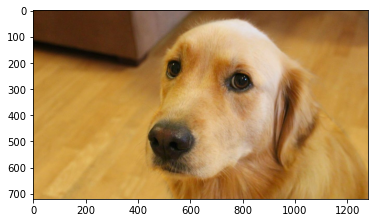

In [118]:
# Test loading an preprocess of an image
import matplotlib.pyplot as plt

img = Image.open("imgs/Bobby.jpeg")
plt.imshow(img)

img_t = preprocessor(img)
batch_t = torch.unsqueeze(img_t,0)  # reshape (batch of size 1)
print(batch_t.size())               # verify dimensions

In [119]:
# Get labels
with open('list_labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]
print(labels[0:20])  # inspect some lables

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee']


In [120]:
# Predict label of Bobby image
resnet.eval() # predict with resnet (no training)
print(" ")
out = resnet(batch_t) # forward pass (predict)
print("\n Size: ", out.size()) # verify 1000 labels (outputs)
_, index = torch.max(out,1)
print("Index: ", index, "\nLabel: ", labels[index], "\nOutput value: ", out[0,index])
pct = torch.nn.functional.softmax(out, dim=1)[0]*100
print("\nConfidence: ", round(pct[index[0]].item(),2), "%")

 

 Size:  torch.Size([1, 1000])
Index:  tensor([207]) 
Label:  golden retriever 
Output value:  tensor([15.6744], grad_fn=<IndexBackward>)

Confidence:  96.29 %
